In [82]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Let's consider an "expectation value" of a random variate X:

$$ E_p[X]=\sum_x x~p(x), \\$$

where p(x) is the probability of getting x, this is analagous to the mean.  The variance of a distribution is defined as:

$$ V_p[X]=\sum_x(X-E_p[X])^2)~p(x) \\$$

For the Bernoulli distribution p(x)=p=constant and is equal to the mean.  Recall that p(x)=p if x=1 and p(x)=1-p if x=0 (so we only have two terms in the above sums).  The variance is then:

$$ V_p[X]=(1-p)^2~p + (0-p)^2~(1-p) \\
=p(1-p)$$

The law of large numbers (central limit theorem) is what makes the frequentist interpretation of probability possible.

In [83]:
''' taking samples from a set of coin flips '''
# here we compile 20 means

from scipy.stats.distributions import bernoulli

def throw_a_coin(size_samples):
    brv = bernoulli(0.5)
    return(brv.rvs(size=size_samples))

def make_throws(num_samples, size_samples):
    start = np.zeros((num_samples, size_samples), dtype=int)
    for i in range(num_samples):
        start[i,:] = throw_a_coin(size_samples)
    return np.mean(start, axis=1)

make_throws(5, 10)

array([ 0.6,  0.5,  0.4,  0.4,  0.9])

In [84]:
sample_sizes = np.arange(1,1001,1)
sample_means = [make_throws(200, i) for i in sample_sizes]
mean_of_sample_means = [np.mean(means) for means in sample_means]

(0.48, 0.52)

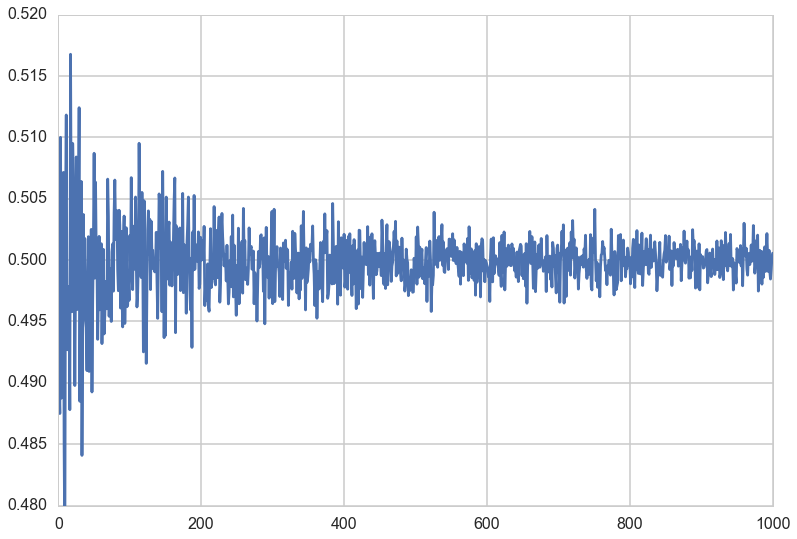

In [85]:
plt.plot(sample_sizes, mean_of_sample_means)
plt.ylim([0.480,0.52])

It's often the case that we are interested in understanding the world from imcomplete data (i.e., from a sampling of the entire set).

We can do inference to try and determine the uncertainty associated with our data set.  This is why the mean of the sample means is interesting; it characterizes the sampling distribution of the mean.

In [86]:
''' what is the estimated sampling distribution
of the mean at different sample sizes?'''

sample_means_at_size_10 = sample_means[9]
sample_means_at_size_100 = sample_means[99]
sample_means_at_size_1000 = sample_means[999]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   3.,  10.,  35.,  51.,  46.,  26.,  21.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
         0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41

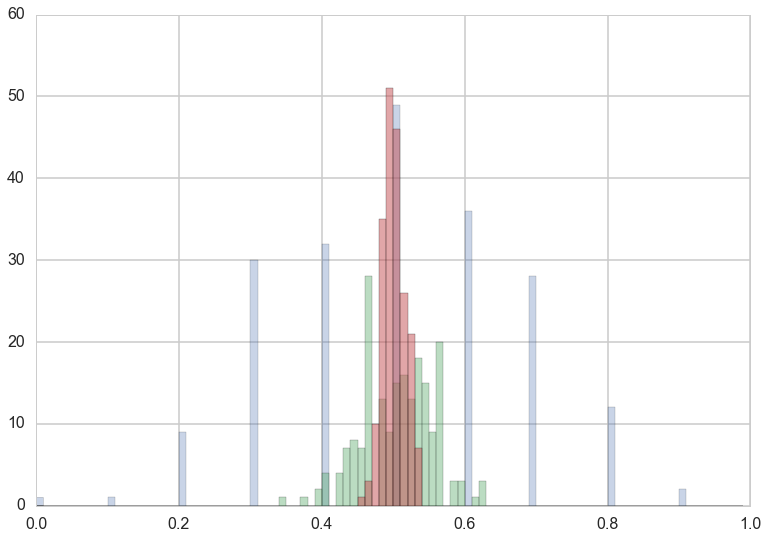

In [87]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.3)
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4)
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.5)

The distribution becomes increasingly localized about the origin for larger sample sizes.

(0, 1050)

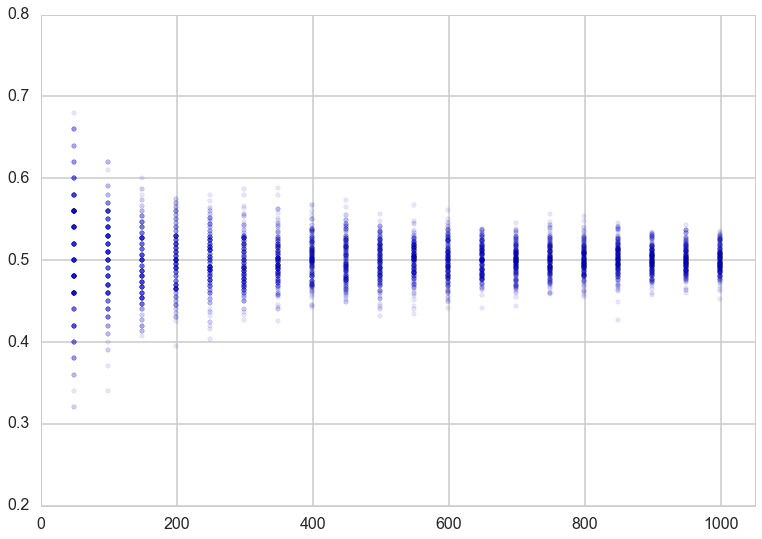

In [88]:
''' we can plot this distribution as a function of sample size '''
for i in sample_sizes:
    if i%50 == 0:
        plt.scatter([i-1]*200, sample_means[i-1], alpha=0.1)
plt.xlim(0,1050)

## kidney cancer case
Notice, above, the large variability from small sample sizes.  We consider now an example about kidney cancers in various countries.

"Let's think of each country as a sample in the population of kidney cansers, with the observations being the occurances per year of cancer in that country."  In this case the low population countries represent small size samples.  The cancer rate in the coutnry is (we'll say) the sample mean of the caner rates over multiple years (in that country).


Note the "typical bivariate triangle-shaped distribution"
<img src="Lab3_content/cancer_rate_per_population.png">

####  Variation of the sample mean

When increasing the sample size, the variance drops off as 1/N:

$$ V(\bar{x})=\frac{\sigma^2}{N}. \\$$

where Bar[x] is the mean and we are looking here at the variance of the average mean.  The standard deviation goes as sqrt(1/N)

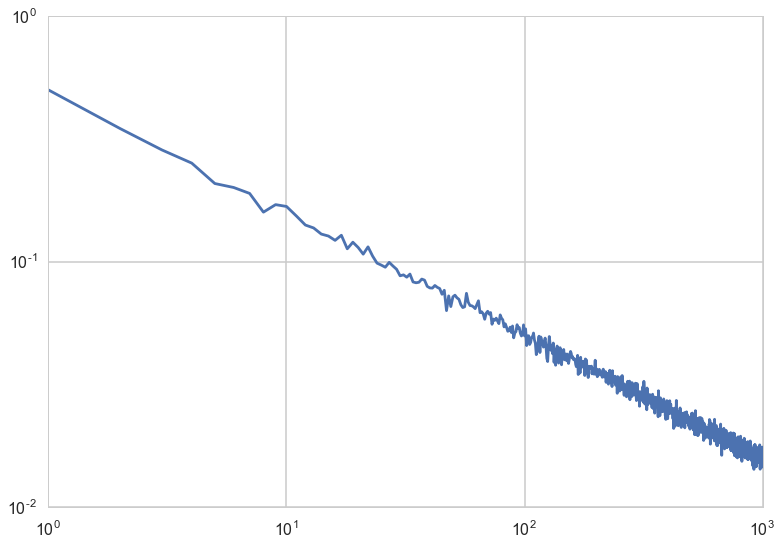

In [89]:
std_of_sample_means = [np.std(means) for means in sample_means]
plt.plot(sample_sizes, std_of_sample_means)
plt.xscale('log')
plt.yscale('log')

#### Weight-watchers example from the lab:

"1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many (like, say, 1000) samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/√100 = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean and would thus be very unlikely to be from the weight watchers group"

#### Gaussian distribution

The sampling distribution of means has (itself) a mean and variance:

$$ \mu and \sigma^2/N, \\$$

where N appears to be the number of people per mean sample (as in the example ablve).  The probability density for this distribution is:

$$ N(x) = \frac{1}{s \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2s^2}}. \\$$

The mean is mu and the variance is s^2.

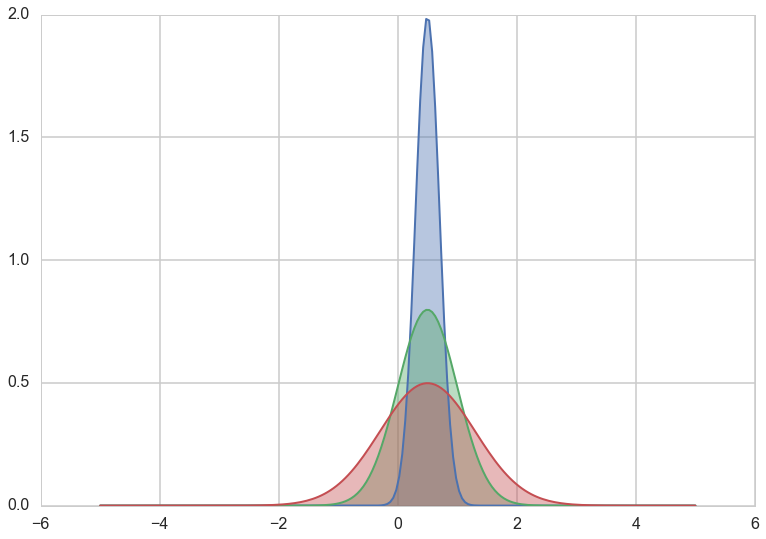

In [90]:
norm = sp.stats.norm
x = np.linspace(-5, 5, 200)
colors = sns.color_palette()

fig = plt.figure()
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)

#### Central limit theorem

It turns out this is slightly different from the law of large numbers.  It means that a sample n data poitns drawn from X (with mean mu and variance sig^2) also has mean mu and variance sig^2/n.  Note that mu is the mean of the means and sig is also accosiated with the means data set.

If we consider, as an example, a binomial distribution B(n, k, p) in the large n limit, the number of successes k in n trials can be treated as the sum of n independent, identially distributed variables with values 1 or 0 (e.g., the polling or coin tosses from earlier).

Using the central limit theorem, we can replace the binomial distribution at large n by a gaussian where k is now a continuous variable, and whose mean is the mean of the binomial: np and the variance is: np(1-p).

The accuracy of this approximation depends on the variance. A large variance makes for a broad distribution spanning many discrete k, thus justifying the transition from a discrete to a continuous distribution.

Polling example: "suppose I told you that I'd polled 1000 people in Ohio and found that 600 would vote Democratic, and 400 republican. Imagine that this 1000 is a "sample" drawn from the voting "population" of Ohio. Assume then that these are 1000 independent bernoulli trials with p=600/1000 = 0.6. Then we can say that, from the CLT, the mean of the sampling distribution of the mean of the bernoulli or equivalently the binomial is 0.6, with a variance of 0.6∗0.4/1000=0.00024. Thus the standard deviation is 0.015 for a mean of 0.6, or 1.5% on a mean of 60% voting Democratic. This 1.5% if part of what pollsters quote as the margin of error of a candidates winning; they often include other factors such as errors in polling methodology."

A few specific things we can say, given specific examples, due to the central limit theorem:

- If we know a lot about a population, and randomly sampled 100 points from it, the sample mean would be be with 99.7% confidence within 0.3*sig of the population mean.  Therefore the sample mean can be quite representative of the population mean

- If we have a well sampeld 100 data points, we could make strong statements about the population as a whole.

- We can infer if a sample is consistent with a population (e.g., the weight-watchers example from earlier)

- Can compare two samples and incur if they are from the same population.

#### Sampling distribution of the variance

"We'll stick with a high number of replicates and plot the mean of the sample variances as well as the truish sampling distribution of the variances at a sample size of 100." 

Not sure about this:

Remember that the mean of the sample means and the mean of the sample are the same.  However the variance of a sample (of means) is sig^2/N where sig^2 is the variance of ONE SAMPLE.  This is illustrated below:

C:\Anaconda3\Lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


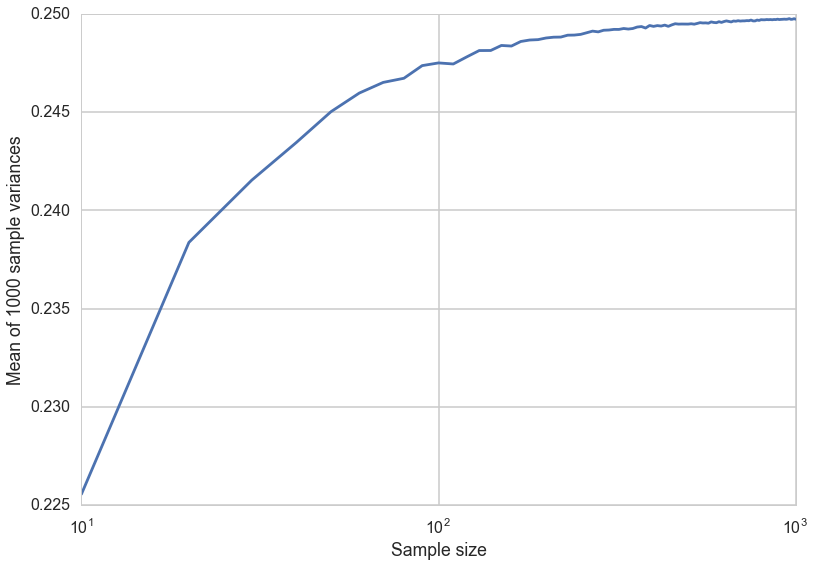

In [91]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)

sample_sizes=np.arange(0,1001,10)

sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log")
plt.ylabel('Mean of 1000 sample variances')
plt.xlabel('Sample size')

##### "The "mean sample variance" asymptotes to the true variance of 0.25 by a sample size of 100."

we would ecpect the sample variance to be:
$$ E[V] = \frac{N-1}{N}\sigma^2 \\$$

"In other words, the expected value of the sample variance is LESS than the actual variance" --but only very slightly it seems

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    7.,   46.,  946.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([ 0.2  ,  0.201,  0.202,  0.203,  0.204,  0.205,  0.206,  0.207,
         0.208,  0.209,  0.21 ,  0.211,  0.212,  0.213,  0.214,  0.215,
         0.216,  0.217,  0.218,  0.219,  0.22 ,  0.221,  0.222,  0.223,
         0.224,  0.225,  0.226,  0.227,  0.228,  0.229,  0.23 ,  0.231,
         0.232,  0.233,  0.234,  0.235,  0.236,  0.237,  0.238,  0.239,
         0.24 ,  0.241,  0.242,  0.243,  0.244,  0.245,  0.246,  0.247,
         0.248,  0.249,  0.25 ,  0.251,  0.252,  0.253,  0.254,  0.255,
         0.256,  0.257,  

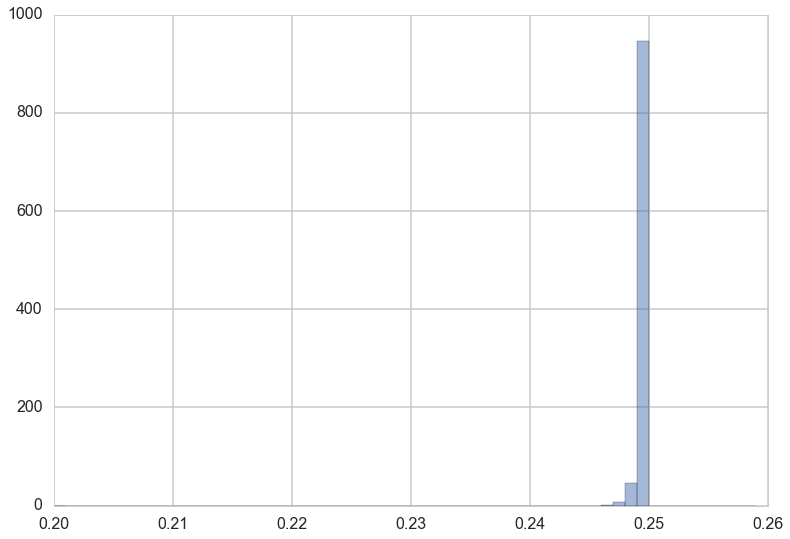

In [92]:
''' most of them have a variance of 0.25, the "true variance of the sampling distribution" '''

plt.hist(sample_vars_1000_replicates[100], bins=np.arange(0.2,0.26,0.001), alpha=0.5)

#### US 2012 election polling application

Here we estimate probabilities to plug into the predictive model.

We use the proportion of people in each state who identify with one one political party or the other.

In [93]:
gallup_2012 = pd.read_csv("Lab3_content/g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


"
Each row lists a state, the percent of surveyed individuals who identify as Democrat/Republican, the percent whose identification is unknown or who haven't made an affiliation yet, the margin between Democrats and Republicans (Dem_Adv: the percentage identifying as Democrats minus the percentage identifying as Republicans), and the number N of people surveyed."

''' using finite sample size as a source of error '''

gallup_2012["Sampling error (%)"] = 100.0*np.sqrt((gallup_2012.Democrat/100.0)*((100.0-gallup_2012.Democrat)/100.0)/(gallup_2012["N"]-1))
gallup_2012.head()

"On their webpage discussing these data, Gallup notes that the sampling error for the states is between 3 and 6%, with it being 3% for most states. This is more than what we find, so lets go with what Gallup says.
We now use Gallup's estimate of 3% to build a Gallup model with some uncertainty. We will, using the CLT, assume that the sampling distribution of the Obama win percentage is a gaussian with mean the democrat percentage and standard error the sampling error of 3\%."

We can use the "Dem_Adv" column determine the probabilities by sampling shifted Gaussians and checkingthe probability of the sample being in the positive part of the gaussian.

"To do this we simply need to find the area under the curve of a Gaussian that is on the positive side of the x-axis. The probability that a sample from a Gaussian with mean μ and standard deviation σ exceeds a threhold z can be found using the the Cumulative Distribution Function of a Gaussian:"

$$ CDF(z) = \frac{1}{2}\big( 1 - erf\big(\frac{z-\mu}{\sqrt{2\sigma^2}}\big) \big) \\$$

In [94]:
from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3 # as per the paragraph above
    # get the chance by sampling the cumulative distribution function
    # where mu=Dem_Adv (Democrat Advantage)
    prob = 0.5*(1+erf(gallup["Dem_Adv"]/np.sqrt(2*sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [95]:
model = uncertain_gallup_model(gallup_2012)
model.head(10)

,Obama
State,
Alabama,0.000003
Alaska,0.002555
Arizona,0.006210
Arkansas,0.592249
California,0.999998
Colorado,0.041518
Connecticut,1.000000
Delaware,1.000000
District of Columbia,1.000000


In [96]:
predictwise = pd.read_csv('Lab3_content/predictwise.csv').set_index('States')
print(predictwise)
model = model.join(predictwise.Votes) # attach the Votes catagory from predictwise model to ours
print(model)

                      Obama  Romney  Votes
States                                    
Alabama               0.000   1.000      9
Alaska                0.000   1.000      3
Arizona               0.062   0.938     11
Arkansas              0.000   1.000      6
California            1.000   0.000     55
Colorado              0.807   0.193      9
Connecticut           1.000   0.000      7
Delaware              1.000   0.000      3
District of Columbia  1.000   0.000      3
Florida               0.720   0.280     29
Georgia               0.004   0.996     16
Hawaii                1.000   0.000      4
Idaho                 0.000   1.000      4
Illinois              1.000   0.000     20
Indiana               0.036   0.964     11
Iowa                  0.837   0.163      6
Kansas                0.000   1.000      6
Kentucky              0.000   1.000      8
Louisiana             0.000   1.000      8
Maine                 1.000   0.000      4
Maryland              1.000   0.000     10
Massachuset

In [97]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1,1))*model.Votes.values.reshape(-1, 1)
    # -ive 1 means that length or "re-shaped" array will be inferred from original shape
    return obama_votes.sum(axis=0) # sum each element in each row to get list of possilbe results
def plot_simulation(sim_result):
    plt.hist(sim_result, bins=range(200, 538, 1),
        label = 'simulations', align='left', normed=True)
    plt.axvline(332, 0, 0.5, color='orange', label='Actual outcome')
    plt.axvline(269, 0, 0.5, color='r', label='Victory threshold')
    
    p05 = np.percentile(sim_result, 5.0) # number of seats if he performs in bottom 5%
    p95 = np.percentile(sim_result, 95.0) # number of seats if he performs in the top 5%
    ip = int(p95 - p05)
    winp = ((sim_result >= 269).mean() *100)
    
    plt.title("Chance of Obama victory: %0.2f%%, Spread: %d votes" % (winp, ip))
    plt.legend()


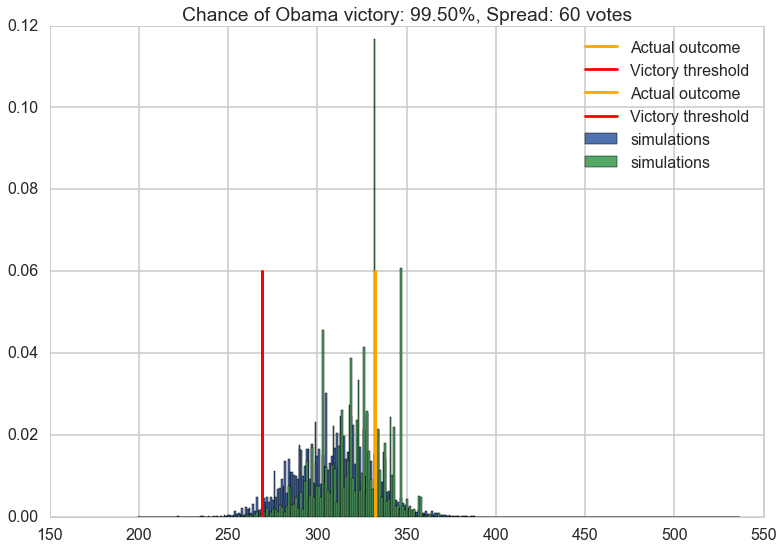

In [98]:
plot_simulation(simulate_election(model, 10000))
plot_simulation(simulate_election(predictwise, 10000)) # the old model (green) looks slightly different